# Task 5 - To Explore Business Analytics

Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data= pd.read_csv("SampleSuperstore.csv")
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# "Profit" vs "Sales" for each Segment in each Region

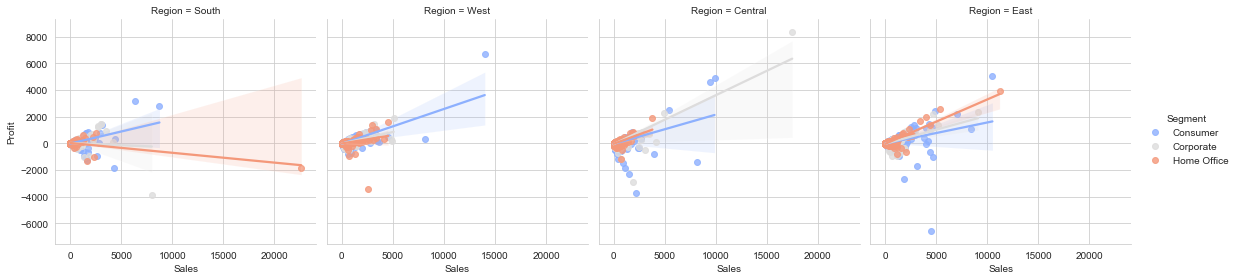

In [90]:

sns.set_style("whitegrid")
sns.lmplot(x='Sales',y='Profit',data=data,col='Region',palette="coolwarm",height=4,hue="Segment")

In [3]:
data= pd.read_csv("SampleSuperstore.csv")
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
Quantity_category=data.groupby("Category")["Quantity"].sum()

In [5]:
Quantity_category

Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity wise distribution of Categories')

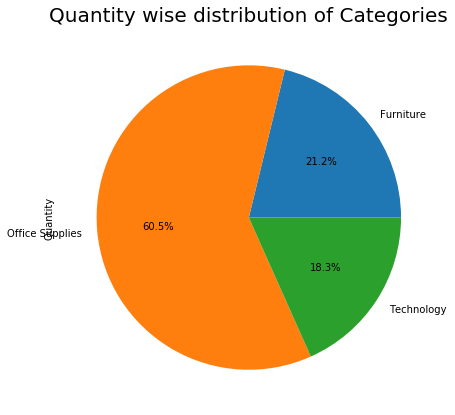

In [6]:
plot=Quantity_category.plot.pie(y="Category",figsize=(7,7),autopct="%1.1f%%")
plot.set_title("Quantity wise distribution of Categories",fontsize=20)

# "Category" vs "Profit" plot

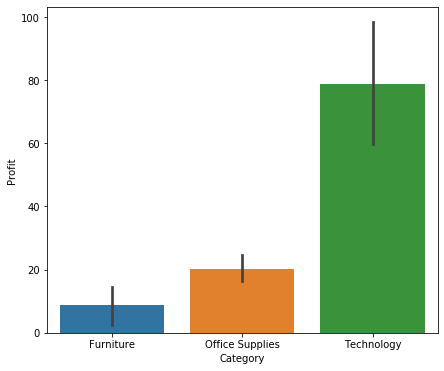

In [7]:
from matplotlib import pyplot
fig_dims=(7,6)
fig,ax=pyplot.subplots(figsize=fig_dims)
sns.barplot(x="Category",y="Profit",data=data)

In [ ]:
# Since "Technology" category is more profitable so more discount should be given 
#in order to increse its demand which is the least

In [9]:
Quantity_region=data.groupby("Region")["Quantity"].sum()

In [10]:
Quantity_region

Region
Central     8780
East       10618
South       6209
West       12266
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity wise distribution in Regions')

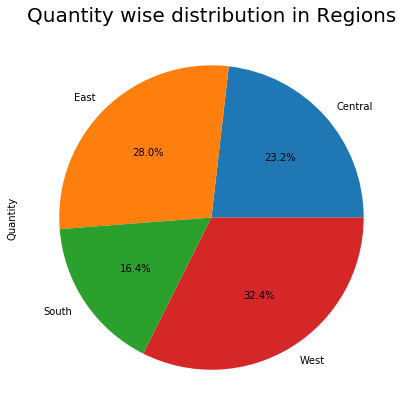

In [11]:
plot=Quantity_region.plot.pie(y="Region",figsize=(7,7),autopct="%1.1f%%")
plot.set_title("Quantity wise distribution in Regions",fontsize=20)

# "Region" vs "Profit" plot

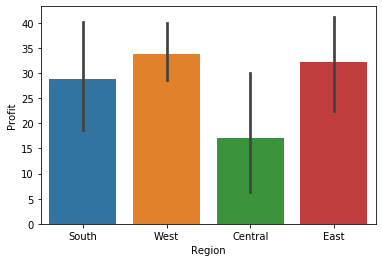

In [12]:
sns.barplot(x="Region",y="Profit",data=data)

In [13]:
#As we saw the distribution of products is more in "west" region and hence profit is also high for this region 
#but in "central" region the profit is not that high according to the numer of products being distributed.
#Therefore central region needs more attention.

# Top 10 profitable cities

In [22]:
df_top_10_cities=data.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)

In [23]:
df_top_10_cities.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


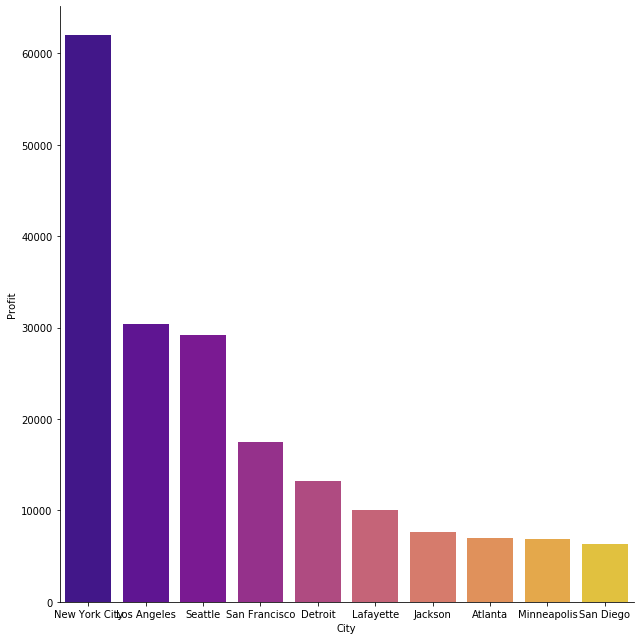

In [39]:
sns.catplot("City","Profit",data=df_top_10_cities.head(10),kind="bar",palette="plasma",height=9)

# Top 10 profitable items

In [30]:
df_top_10_subcat=data.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)

In [31]:
df_top_10_subcat.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


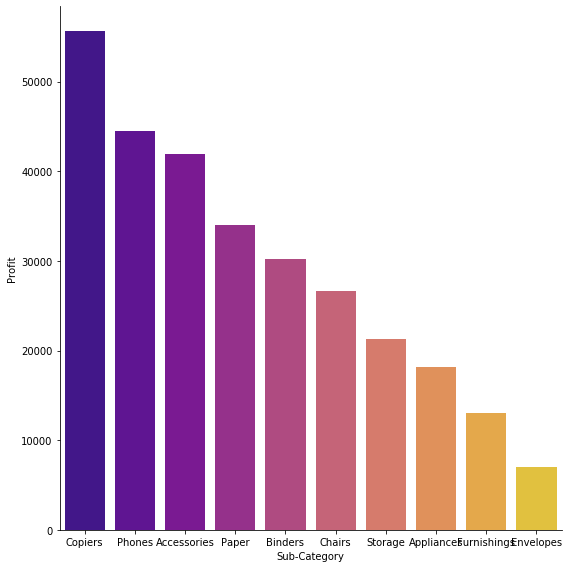

In [40]:
sns.catplot("Sub-Category","Profit",data=df_top_10_subcat.head(10),kind="bar",palette="plasma",height=8)

In [47]:
Quantity_sub=data.groupby("Sub-Category")["Quantity"].sum().sort_values(ascending=False)
Quantity_sub

Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity wise distribution of items')

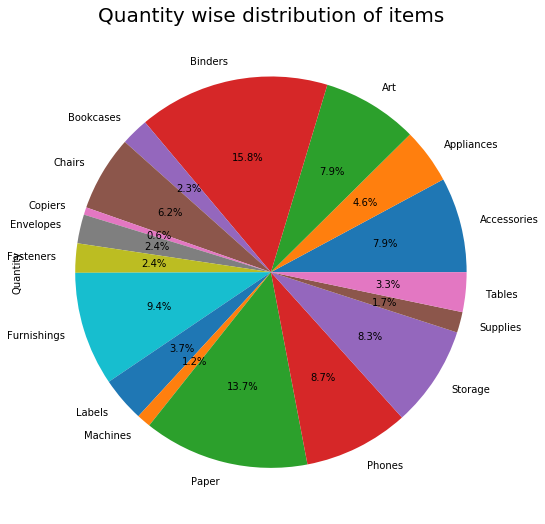

In [46]:
plt1=Quantity_sub.plot.pie(y="Sub-Category",figsize=(9,9),autopct="%1.1f%%")
plt1.set_title("Quantity wise distribution of items",fontsize=20)

In [ ]:
#Since "Copiers" are the top profitable  products so more discount should be given in order to increase more demands as
#the number of "copiers" distributed is the least.
